In [15]:
import torch.nn as nn
import torch
from torch.autograd import Variable
import numpy as np

* ## Steps to implement CNN and Conv2d function with pytorch.

* ## Includes dimension change in very detail.

## Conv2d function

nn.Conv2d(input_channel, output_channel, kernel_size)

* __in_channels (int)__ – Number of channels in the input image
* __out_channels (int)__ – Number of channels produced by the convolution
* __kernel_size (int or tuple)__ – Size of the convolving kernel
* __stride (int or tuple, optional)__ – Stride of the convolution. Default: 1
* __padding (int or tuple, optional)__ – Zero-padding added to both sides of the input. Default: 0
* __dilation (int or tuple, optional)__ – Spacing between kernel elements. Default: 1
* __groups (int, optional)__ – Number of blocked connections from input channels to output channels. Default: 1
* __bias (bool, optional)__ – If True, adds a learnable bias to the output. Default: True 

### Let's have a first look for $in\_channel = 1$, and $out\_channel = 1$


In [16]:
input1 = Variable(torch.ones(1,1,5,5))
print(input1)
x = torch.nn.Conv2d(in_channels = 1, out_channels = 1
                    , kernel_size = 3)
out = x(input1)
print(out)
print(list(x.parameters()))

tensor([[[[ 1.,  1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.,  1.]]]])
tensor([[[[ 0.4610,  0.4610,  0.4610],
          [ 0.4610,  0.4610,  0.4610],
          [ 0.4610,  0.4610,  0.4610]]]])
[Parameter containing:
tensor([[[[ 0.1359, -0.1988, -0.1155],
          [ 0.3123,  0.2445,  0.1525],
          [-0.0144, -0.1814,  0.1485]]]]), Parameter containing:
tensor(1.00000e-02 *
       [-2.2522])]



In this case, kernel size is 3, input_channel and output_channel is 1, then 

$kernel = 1,1,3,3$

Denote in_channel is X , out_channel is N , kernel size is K.

$kernel = N,X,K,K$

As can be seen from above, $out$ only has one channel, it means only 1 feature map got.

$x.parameters$ has two parameter, one is W matrix, the other one is bias.

$W$ matrix is kernel matrix

If increase N from 1 to 3, then it means they have 3 kernels to convolv one channel, 

The result would contains 3 feature map:


In [20]:
input2 = Variable(torch.ones(1,1,5,5))
x2 = torch.nn.Conv2d(in_channels = 1, out_channels = 3
                    , kernel_size = 3)
out2 = x2(input2)
print("out2.size is {}".format(out2.size()))

out2.size is torch.Size([1, 3, 3, 3])


The output feature map is 3, means out_channel is 3, use 3 filters to convolv $input2$, 

kernel size is $3,1,3,3$, means use 3 filters to make up a kernel.

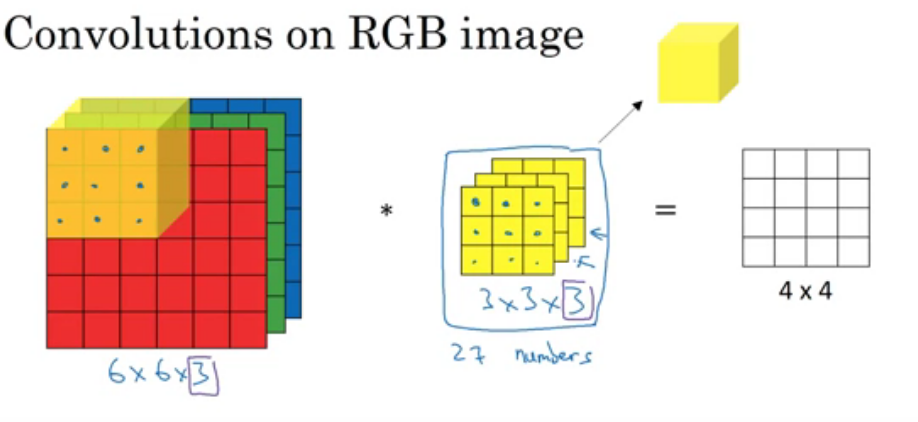

3 in rectangle is in_channel

When $in\_channel$ increase to X (3 as figure above), and $out\_channel$ N (1 as figure above) has different meaning.

There are $N$ filters, each filter is $3*3$. Feature map is $4*4$

In [21]:
input3 = Variable(torch.ones(1,3,6,6))
x3 = torch.nn.Conv2d(in_channels = 3, out_channels = 1
                    , kernel_size = 3)
out3 = x3(input3)
print("\nout3.size is {}\n".format(out3.size()))


out3.size is torch.Size([1, 1, 4, 4])



kernel size is 1,3,3,3, means use 1 filter $(3,3,3)$ to make up a kernel.

When want to apply different kernel in one RGB images, we can adjust output channel
Let's say the first 3,3,3 filter for vertical feature
Apply other 3,3,3 filter to recognize horizantol feature
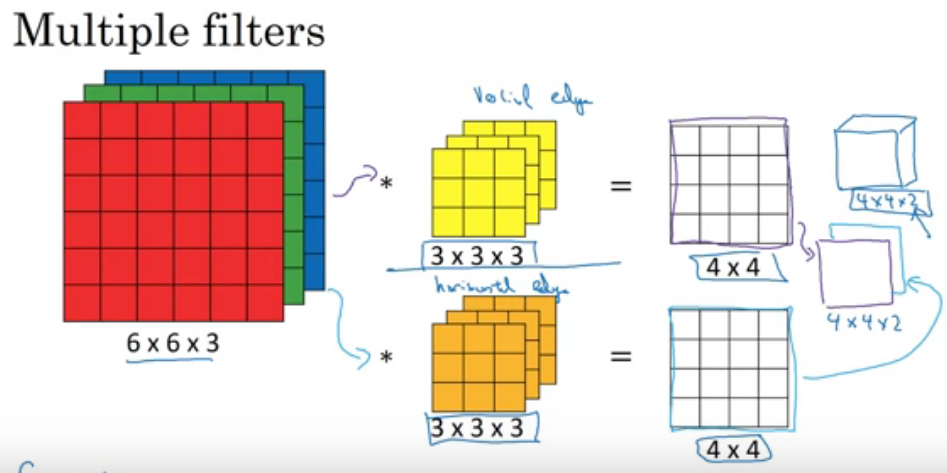

Means our kernel is $(N,X,3,3)$  $N=2, X=3$ 
Now out_channel $N=2$
The result would be $(2,4,4)$

In [22]:
input4 = Variable(torch.ones(1,3,6,6))
x4 = torch.nn.Conv2d(in_channels = 3, out_channels = 2
                    , kernel_size = 3)
out4 = x4(input4)
print("\n\nOut size is  " + str(out4.size())+"\n\n")



Out size is  torch.Size([1, 2, 4, 4])


